## SSP3 population projection 2020 - 2100

[source](https://tntcat.iiasa.ac.at/SspDb/dsd?Action=htmlpage&page=40)

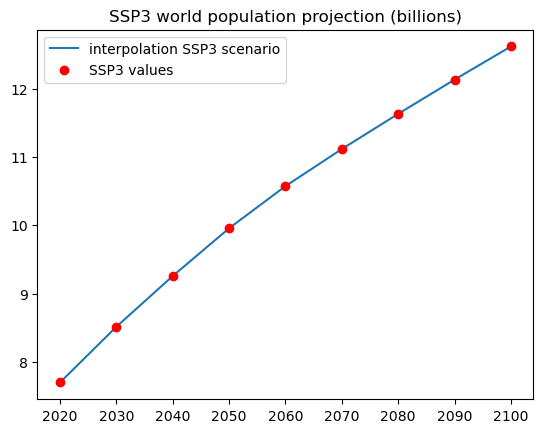

In [1]:
import numpy as np
years = np.arange(2020, 2101)
x_years_ssp3 = list(np.arange(2020, 2101, 10))
y_pop_ssp3 = np.array([7697.854, 8514.307, 9257.220, 9957.131, 10574.362, 11117.377, 11633.415, 12134.327, 12620.136])

from scipy.interpolate import interp1d
f = interp1d(x_years_ssp3, y_pop_ssp3)

population_interpolated_ssp3_values = f(years) 

import matplotlib.pyplot as plt
plt.title("SSP3 world population projection (billions)")

plt.plot(years, population_interpolated_ssp3_values/1000, label="interpolation SSP3 scenario", zorder=0);
plt.scatter(x_years_ssp3, y_pop_ssp3/1000, c="r", zorder=1, label="SSP3 values");
plt.legend();

## SSP 3 World GDP projection

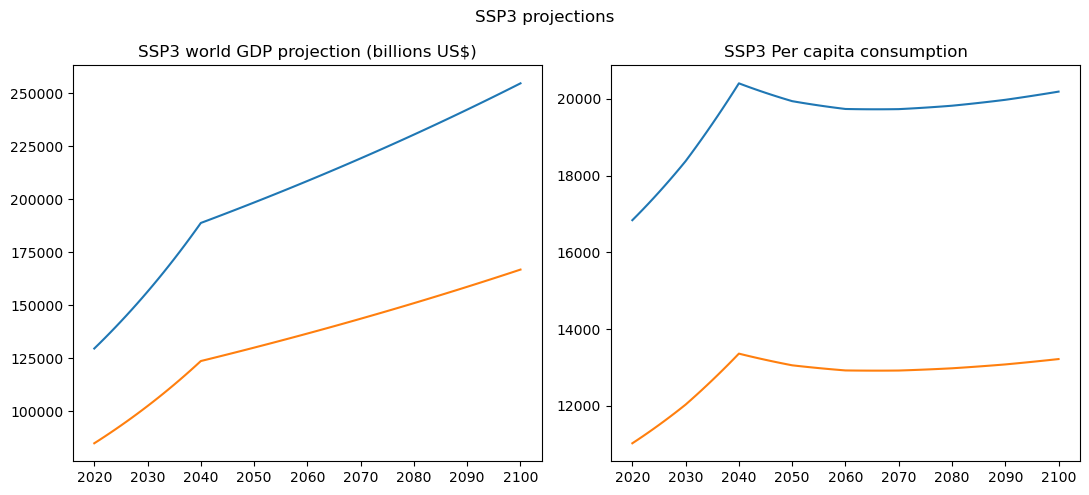

In [2]:
import pandas as pd
df_ssp3 = pd.DataFrame()

inflation_2005_to_2020 = 1.33 # source: https://www.in2013dollars.com/us/inflation/2005?endYear=2020&amount=1
SSP3_2020_GDP_2005_US_DOLLAR = 97447.997 # source: https://tntcat.iiasa.ac.at/SspDb/dsd?Action=htmlpage&page=40
SSP3_2020_GDP_2020_US_DOLLAR = SSP3_2020_GDP_2005_US_DOLLAR * inflation_2005_to_2020

actual_2020_GDP_2020_US_DOLLAR = 84894.92 #source : https://www.statista.com/statistics/268750/global-gross-domestic-product-gdp/



def gdp_projection(init_val) -> list[float]:
    current_gdp = init_val
    gdps = [current_gdp]
    for year in years[1:]:
        if year <= 2040:
            gdp_growth = 1.019
        if 2040 < year <= 2100:
            gdp_growth = 1.005
        current_gdp *= gdp_growth
        gdps.append(current_gdp)
    return gdps
    
df_ssp3["years"] = years
df_ssp3["gross_output"] = gdp_projection(SSP3_2020_GDP_2020_US_DOLLAR)
df_ssp3["pc_consumption"] = df_ssp3["gross_output"] / population_interpolated_ssp3_values * 1000
df_ssp3.to_csv("economics_df_ssp3.csv")


df_ssp3_adjusted_gdp = df_ssp3.copy()
df_ssp3_adjusted_gdp["gross_output"] = gdp_projection(actual_2020_GDP_2020_US_DOLLAR)
df_ssp3_adjusted_gdp["pc_consumption"] = df_ssp3_adjusted_gdp["gross_output"] / population_interpolated_ssp3_values * 1000
df_ssp3_adjusted_gdp.to_csv("economics_df_ssp3_adjusted_gdp.csv")

fig, ax = plt.subplots(1,2, figsize=(11,5))
fig.suptitle("SSP3 projections")
ax[0].set_title("SSP3 world GDP projection (billions US$)")
ax[0].plot(years, df_ssp3["gross_output"], label="SSP3 GDP projection (2005)");
ax[0].plot(years, df_ssp3_adjusted_gdp["gross_output"], label="SSP3 GDP projection (adjusted with actual 2020 GDP)");

ax[1].set_title("SSP3 Per capita consumption")
ax[1].plot(years, df_ssp3["pc_consumption"], label="SSP3 GDP projection (2005)");
ax[1].plot(years, df_ssp3_adjusted_gdp["pc_consumption"], label="SSP3 GDP projection (adjusted with actual 2020 GDP)");
fig.tight_layout();